In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
#Extract Data
data = pd.read_csv('kmeans_data.txt', sep='  ',names=['x','y'],header=None)
train_data = np.array(data)
print(train_data)

[[-0.65224338 -0.75800961]
 [ 3.8584055   2.0623607 ]
 [-1.6328513   5.3827894 ]
 ...
 [-3.1250826  -4.6770166 ]
 [ 0.94902872  0.3151896 ]
 [-1.0567392   5.3125869 ]]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7772\2884576350.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('kmeans_data.txt', sep='  ',names=['x','y'],header=None)


In [3]:
train_x = data['x']
train_y = data['y']

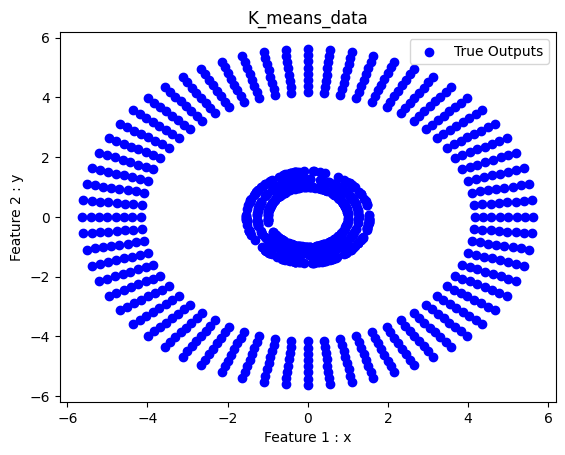

In [4]:
# Plot the graph
# Scatter Plot for models_predicted_y and true_y
plt.scatter(train_x, train_y, color='blue', label='True Outputs', marker='o')
plt.xlabel('Feature 1 : x')
plt.ylabel('Feature 2 : y')
plt.title('K_means_data')
plt.legend()
plt.show()


In [5]:
# Feature Transformation
def feature_transformation(train_dataset):
    new_data = []
    numpy_dataset = np.array(train_dataset)
    for train_data in train_dataset:
        
        x = train_data[0]**2  
        y = train_data[1]**2
        z = np.sqrt(np.abs(train_data[0])*np.abs(train_data[1]))
        new_data.append([x,y,z])
    return new_data


In [6]:
# Transform input feature
transform_feature = pd.DataFrame(feature_transformation(train_data))
transform_feature.columns = ['x', 'y', 'z']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


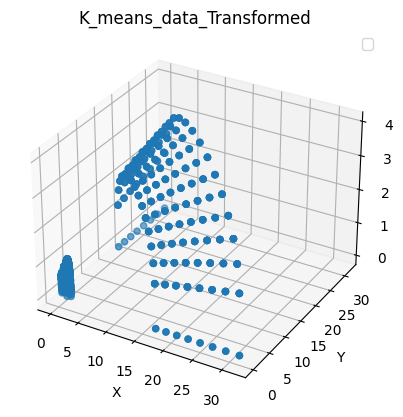

In [7]:
# Plot the graph
x = transform_feature['x']
y = transform_feature['y']
z = transform_feature['z']

# Scatter Plot for models_predicted_y and true_y
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('K_means_data_Transformed')
plt.legend()
plt.show()

In [8]:
# Function to calculate Euclidean distance
def euclidean_distance(point, centroid):
    return np.sqrt(sum((point - centroid) ** 2))

In [9]:
# K means Clustering

#Initialise Centroid
centroids = [list(transform_feature.iloc[0]),list(transform_feature.iloc[1])]
transform_feature_numpy = np.array(transform_feature)
cluster_id  = []
# print(centroid)

# Do k-means
for i in range(10):
    cluster_id = []
    for data_row in transform_feature_numpy:
        
        distance_1 = euclidean_distance(data_row, np.array(centroids[0]))
        distance_2 = euclidean_distance(data_row, np.array(centroids[1]))
        if distance_1 < distance_2:
            cluster_id.append(0)
        else:
            cluster_id.append(1)
    
    # Divide the data based on cluster IDs
    cluster_0 = []
    cluster_1 = []
    for i,id in enumerate(cluster_id):
        if id == 0:
            cluster_0.append(list(transform_feature_numpy[i]))
        else:
            cluster_1.append(list(transform_feature_numpy[i]))
    
    mean_cluster_1 = np.mean(cluster_0, axis=0)
    mean_cluster_2 = np.mean(cluster_1, axis=0)
    centroids = ([mean_cluster_1,mean_cluster_2])
    print(mean_cluster_1,mean_cluster_2)




[0.87745219 4.33519949 0.87560826] [15.01572473  9.80035067  2.81903865]
[0.90812364 3.7746059  0.86791346] [14.56394721 10.4458602   2.77400244]
[0.84326375 2.39688672 0.77559375] [13.33556986 11.46100324  2.70246454]
[0.81079855 0.80139701 0.67939286] [12.09852432 12.09852432  2.60071291]
[0.81079855 0.80139701 0.67939286] [12.09852432 12.09852432  2.60071291]
[0.81079855 0.80139701 0.67939286] [12.09852432 12.09852432  2.60071291]
[0.81079855 0.80139701 0.67939286] [12.09852432 12.09852432  2.60071291]
[0.81079855 0.80139701 0.67939286] [12.09852432 12.09852432  2.60071291]
[0.81079855 0.80139701 0.67939286] [12.09852432 12.09852432  2.60071291]
[0.81079855 0.80139701 0.67939286] [12.09852432 12.09852432  2.60071291]


AttributeError: 'function' object has no attribute 'legend_elements'

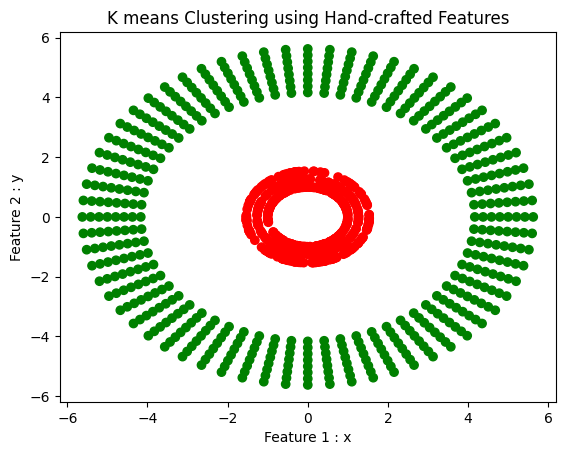

In [10]:
# Print the cluster

# Define colors for each cluster
colors = {0: 'red', 1: 'green'}
temp = pd.DataFrame(data=data)
temp['cluster_id'] = cluster_id

# Create a scatter plot
plt.scatter(temp['x'], temp['y'], c=temp['cluster_id'].map(colors))
plt.xlabel('Feature 1 : x')
plt.ylabel('Feature 2 : y')
plt.title('K means Clustering using Hand-crafted Features')
plt.show()
